<a href="https://colab.research.google.com/github/Minazor/GlobalAIHub_Bootcamp_Project/blob/main/GlobalAIHub_MedicalCostAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [4]:
insurance = pd.read_csv("insurance.csv")

In [5]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
insurance['region'].unique()
labelencoder = LabelEncoder()
insurance['region_encode'] = labelencoder.fit_transform(insurance['region'])
insurance

,age,sex,bmi,children,smoker,region,charges,region_encode
0,19,female,27.900,0,yes,southwest,16884.92400,3
1,18,male,33.770,1,no,southeast,1725.55230,2
2,28,male,33.000,3,no,southeast,4449.46200,2
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,2
1336,21,female,25.800,0,no,southwest,2007.94500,3


In [11]:
insurance['bmi'].value_counts()
#Its really hard that see the distribution of BMI with this way. So,

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

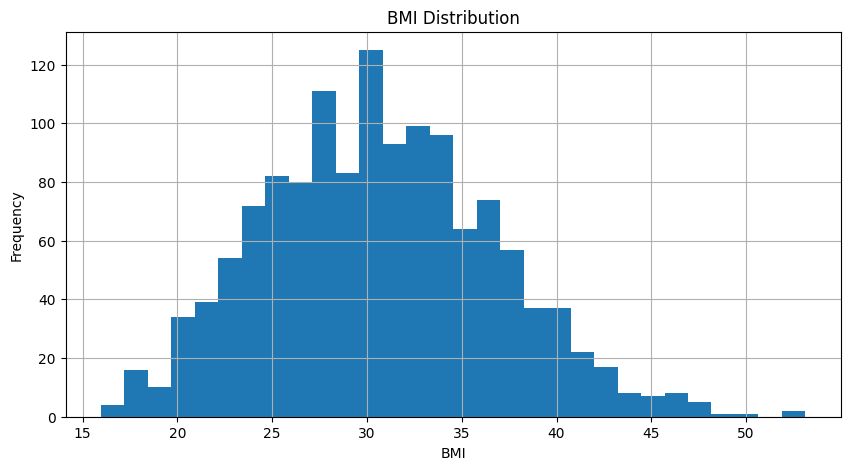

In [12]:
#We can see it easily with histogram.
insurance['bmi'].hist(bins= 30, figsize=(10, 5))
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

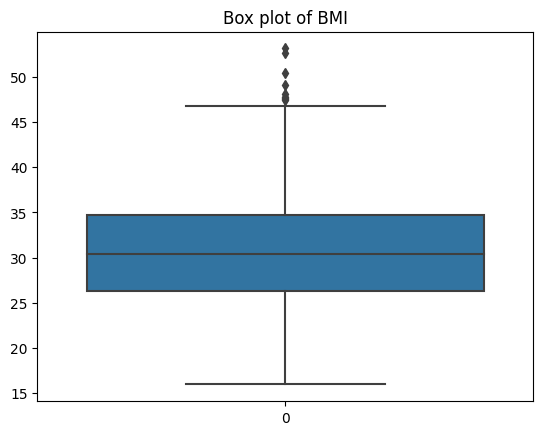

In [13]:
sns.boxplot(insurance['bmi'])
plt.title('Box plot of BMI')
plt.show()

#As we can see there are some outliers at the top of the Box Plot

In [14]:
#outlier suppression for bmi
Q1 = insurance['bmi'].quantile(0.25)
Q3 = insurance['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

insurance['bmi'] = insurance['bmi'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

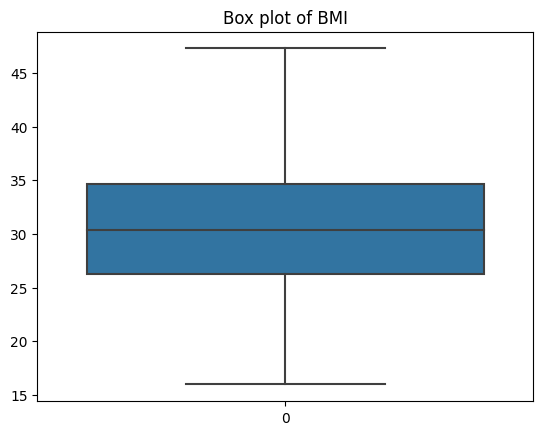

In [15]:
sns.boxplot(insurance['bmi'])
plt.title('Box plot of BMI')
plt.show()

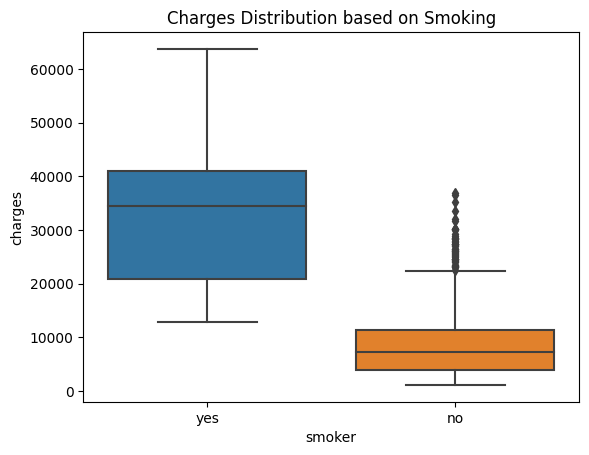

In [16]:
#We can see this relationship at box plot too. There are some outliers like no-smoker but have high charge.
sns.boxplot(x='smoker', y='charges', data=insurance)
plt.title('Charges Distribution based on Smoking')
plt.show()

In [17]:
# smoker == 0 (yani sigara içmeyenler) için charges sütunundaki aykırı değerleri baskılamak:
non_smokers = insurance[insurance['smoker'] == "no"]

Q1 = non_smokers['charges'].quantile(0.25)
Q3 = non_smokers['charges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerleri baskılayalım:
insurance.loc[insurance['smoker'] == "no", 'charges'] = non_smokers['charges'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))


In [18]:
#encode the sex,smoker and region for find corr between the features
insurance['sex_encode'] = labelencoder.fit_transform(insurance['sex'])
insurance['smoker_encode'] = labelencoder.fit_transform(insurance['smoker'])

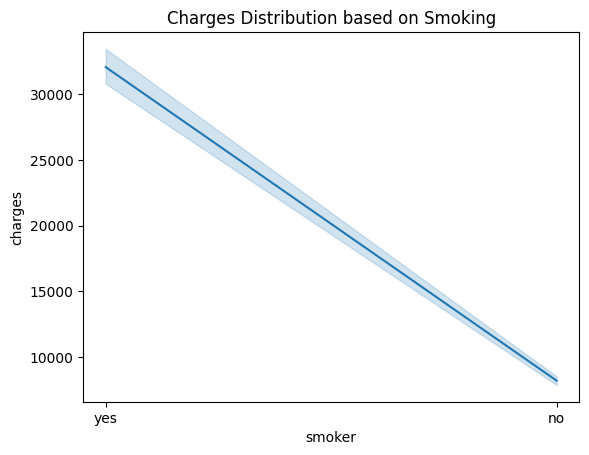

In [19]:
#We can see it when we look at the line plot: If you are a smoker, than you have high charge.
sns.lineplot(x='smoker', y='charges', data=insurance)
plt.title('Charges Distribution based on Smoking')
plt.show()

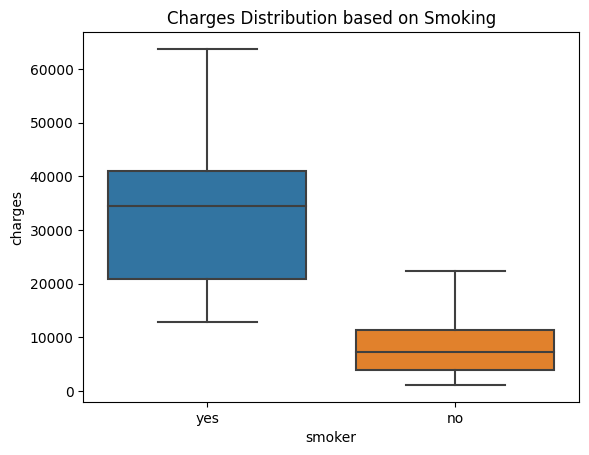

In [20]:
#without outliers
sns.boxplot(x='smoker', y='charges', data=insurance)
plt.title('Charges Distribution based on Smoking')
plt.show()

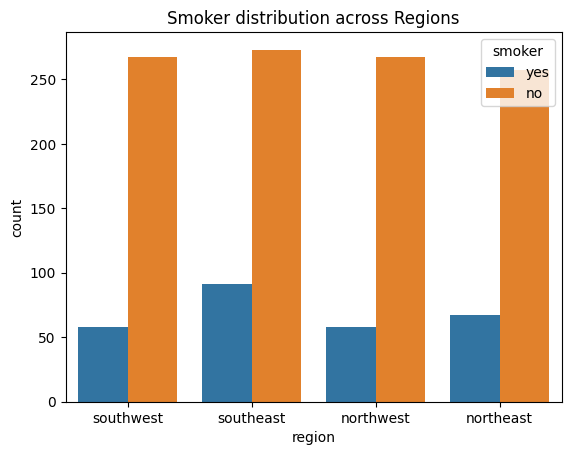

In [21]:
#The number of smokers across regions seems fairly even, with no single region having an exceptionally high or low number of smokers.
sns.countplot(x='region', hue='smoker', data=insurance)
plt.title('Smoker distribution across Regions')
plt.show()

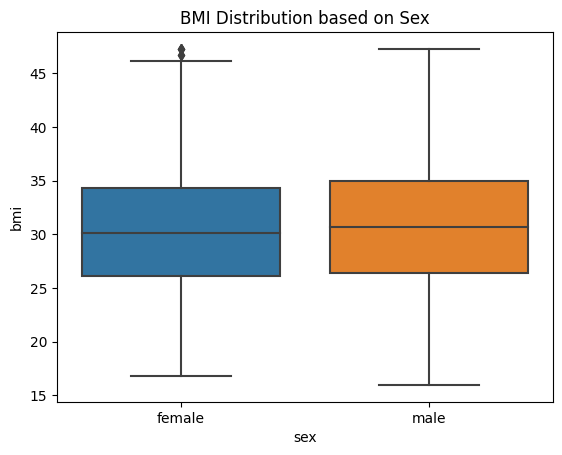

In [22]:
#Both sexes have a similar median BMI. However, the spread of BMI values might be slightly different.
sns.boxplot(x='sex', y='bmi', data=insurance)
plt.title('BMI Distribution based on Sex')
plt.show()

In [23]:
male = insurance[insurance['sex'] == "male"]

Q1 = male['bmi'].quantile(0.25)
Q3 = male['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

insurance.loc[insurance['sex'] == "male", 'bmi'] = male['bmi'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Same for the female

female = insurance[insurance['sex'] == "female"]

Q1 = female['bmi'].quantile(0.25)
Q3 = female['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

insurance.loc[insurance['sex'] == "female", 'bmi'] = female['bmi'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

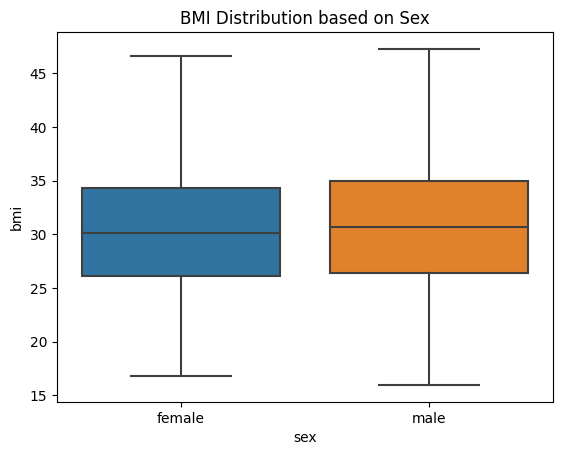

In [24]:
#Both sexes have a similar median BMI. However, the spread of BMI values might be slightly different.
sns.boxplot(x='sex', y='bmi', data=insurance)
plt.title('BMI Distribution based on Sex')
plt.show()

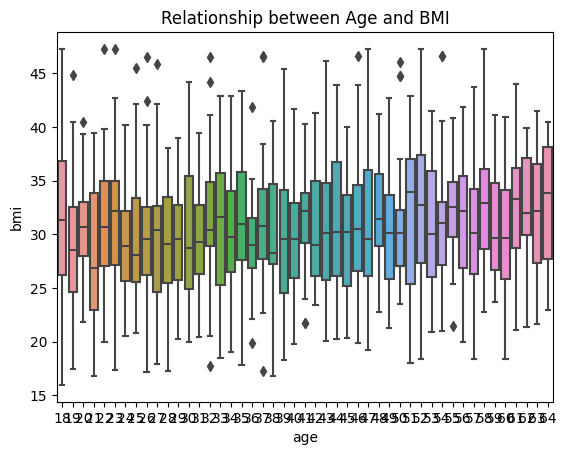

In [25]:
#We can see all bmi distribution for all ages. We can say that some ages have outliers.
#However, age is not necessary for say something about bmi. The correlation is low.
sns.boxplot(x='age', y='bmi', data=insurance)
#sns.set(rc={'figure.figsize':(25,10)})
plt.title('Relationship between Age and BMI')
plt.show()

In [26]:
#outlier suppression for ages
unique_ages = insurance['age'].unique()

for age in unique_ages:
    age_subset = insurance[insurance['age'] == age]

    Q1 = age_subset['bmi'].quantile(0.25)
    Q3 = age_subset['bmi'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Aykırı değerlerin var olup olmadığını kontrol edin:
    outliers = age_subset[(age_subset['bmi'] < lower_bound) | (age_subset['bmi'] > upper_bound)]

    if not outliers.empty:  # Eğer aykırı değerler varsa:
        insurance.loc[(insurance['age'] == age) & (insurance['bmi'] > upper_bound), 'bmi'] = upper_bound
        insurance.loc[(insurance['age'] == age) & (insurance['bmi'] < lower_bound), 'bmi'] = lower_bound


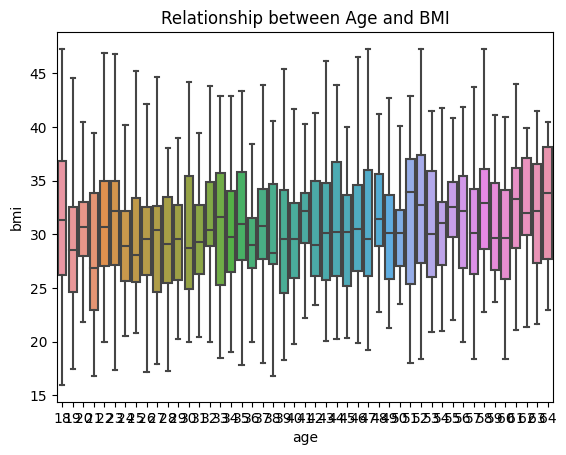

In [27]:
sns.boxplot(x='age', y='bmi', data=insurance)
plt.title('Relationship between Age and BMI')
plt.show()

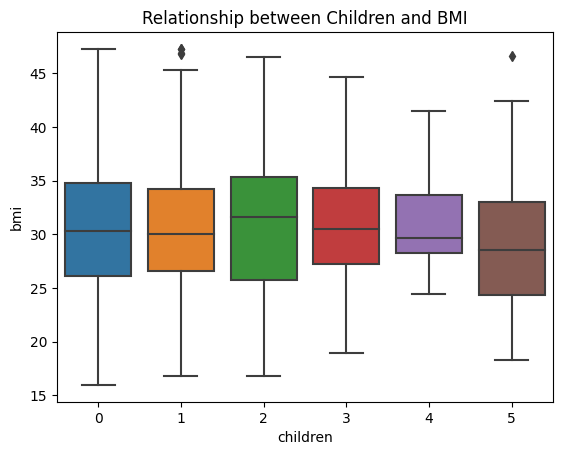

In [28]:
#There is no drastic relationship.
sns.boxplot(x='children', y='bmi', data=insurance)
plt.title('Relationship between Children and BMI')
plt.show()

In [29]:
#outlier suppression
unique_childs = insurance['children'].unique()

for child in unique_childs:
    child_subset = insurance[insurance['children'] == child]

    Q1 = child_subset['bmi'].quantile(0.25)
    Q3 = child_subset['bmi'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outliers = child_subset[(child_subset['bmi'] < lower_bound) | (child_subset['bmi'] > upper_bound)]

    if not outliers.empty:
        insurance.loc[(insurance['children'] == child) & (insurance['bmi'] > upper_bound), 'bmi'] = upper_bound
        insurance.loc[(insurance['children'] == child) & (insurance['bmi'] < lower_bound), 'bmi'] = lower_bound


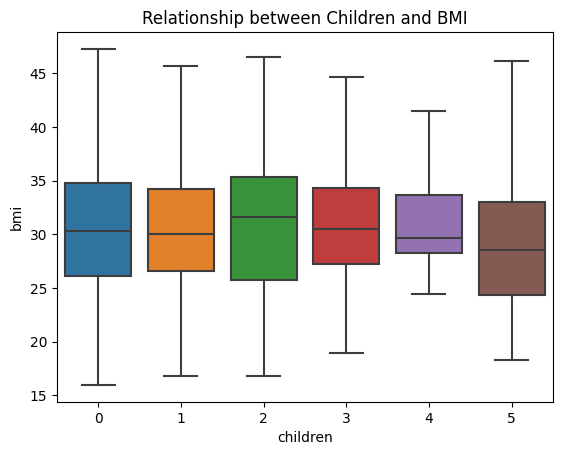

In [30]:
sns.boxplot(x='children', y='bmi', data=insurance)
plt.title('Relationship between Children and BMI')
plt.show()

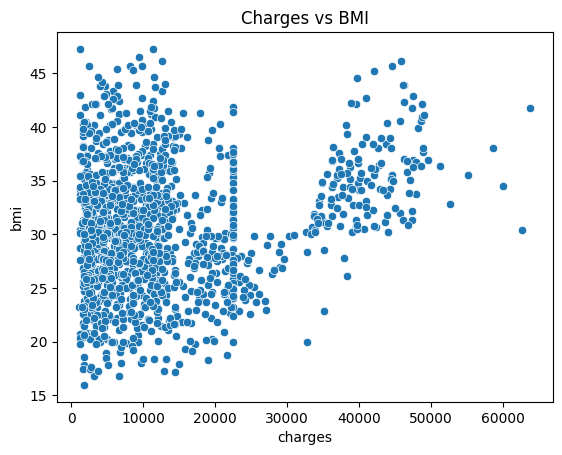

In [31]:
#We can not say anything definite. Because when charges low, there is a crowd.
sns.scatterplot(x='charges', y='bmi', data=insurance)
plt.title('Charges vs BMI')
plt.show()

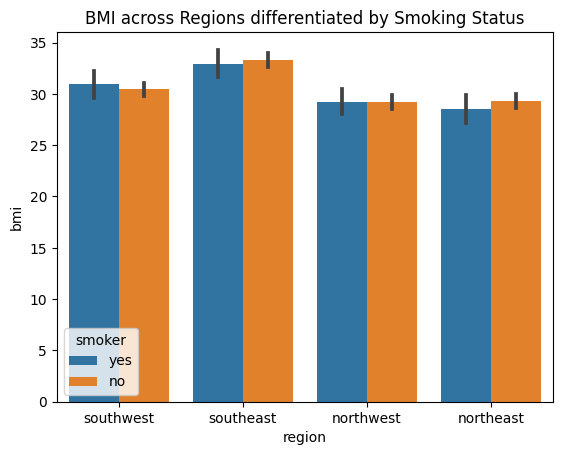

In [32]:
#The the relationship between region, smoker and bmi.
sns.barplot(x='region', y='bmi', hue='smoker', data=insurance)
plt.title('BMI across Regions differentiated by Smoking Status')
plt.show()
#As we can see, almos smokers and non-smokers counts are equal for all regions.

In [33]:
#Region with most children, we have to use group by regions for find sum of children. Than take the maximum value and its region.
region_children = insurance.groupby('region')['children'].sum()
region_with_most_children = region_children.idxmax()
print(f"Region with most children: {region_with_most_children}")

Region with most children: southeast


In [34]:
insurance = pd.get_dummies(insurance, columns=['region'], drop_first=True)
insurance

,age,sex,bmi,children,smoker,charges,region_encode,sex_encode,smoker_encode,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,3,0,1,0,0,1
1,18,male,33.770,1,no,1725.55230,2,1,0,0,1,0
2,28,male,33.000,3,no,4449.46200,2,1,0,0,1,0
3,33,male,22.705,0,no,21984.47061,1,1,0,1,0,0
4,32,male,28.880,0,no,3866.85520,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,1,1,0,1,0,0
1334,18,female,31.920,0,no,2205.98080,0,0,0,0,0,0
1335,18,female,36.850,0,no,1629.83350,2,0,0,0,1,0
1336,21,female,25.800,0,no,2007.94500,3,0,0,0,0,1


### LINEAR REGRESSION ###

In [35]:
X = insurance[["age", "bmi", "children", "sex_encode",	"smoker_encode", "region_encode"]]
y = insurance["charges"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [36]:
# Convert X_train to numpy array if it's a pandas DataFrame. This can be useful when certain algorithms or operations
# expect input data in numpy array format instead of pandas DataFrame.
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.values
# Convert X_test to numpy array if it's a pandas DataFrame. Similar reason as above.
if isinstance(X_test, pd.DataFrame):
    X_test = X_test.values

In [37]:
#Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test

array([[ 0.40114007, -0.90144324,  0.73433626, -1.0246016 , -0.50874702,
        -1.35325561],
       [-0.23863782, -0.08386222, -0.91119211, -1.0246016 , -0.50874702,
        -0.45611589],
       [ 1.75178229, -0.61288523, -0.91119211, -1.0246016 ,  1.96561348,
        -0.45611589],
       ...,
       [-0.09646495, -0.42051323, -0.08842793,  0.97598911, -0.50874702,
        -1.35325561],
       [ 1.04091797,  1.90798958, -0.91119211, -1.0246016 ,  1.96561348,
         0.44102382],
       [ 0.82765867,  0.6215018 , -0.08842793, -1.0246016 , -0.50874702,
         1.33816354]])

In [38]:
# Create and train the model
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [39]:
# Score the model on the train data
print(lm.score(X_train,y_train))

# Score the model on the test data
print(lm.score(X_test,y_test))

0.770999800573442
0.7998213359047545


In [40]:
my_data = np.array([28, 18.72, 0, 1, 0, 2])

# Reshaping and scaling the data
my_data_reshaped = my_data.reshape(1, -1)
my_data_scaled = scaler.transform(my_data_reshaped)
# Predicting
my_charge_pred = lm.predict(my_data_scaled)
print("My charge: {}".format(my_charge_pred[0]))

My charge: 837.4422766100397


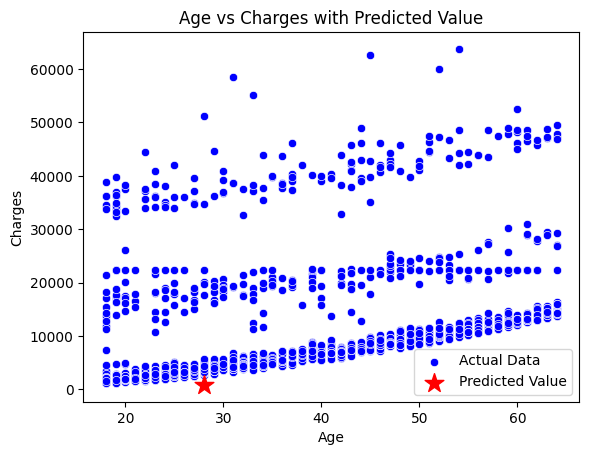

In [41]:
sns.scatterplot(x=insurance['age'], y=insurance['charges'], color='blue', label='Actual Data')

age_value_of_my_data = my_data[0]
plt.scatter(age_value_of_my_data, my_charge_pred, color='red', marker='*', s=200, label='Predicted Value')

plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges with Predicted Value')
plt.legend()
plt.show()

### LOGISTIC REGRESSION ###

In [42]:
X = insurance[["age", "bmi", "children", "sex_encode", "region_encode", "charges"]]
y = insurance["smoker_encode"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [43]:
# Convert X_train to numpy array if it's a pandas DataFrame. This can be useful when certain algorithms or operations
# expect input data in numpy array format instead of pandas DataFrame.
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.values
# Convert X_test to numpy array if it's a pandas DataFrame. Similar reason as above.
if isinstance(X_test, pd.DataFrame):
    X_test = X_test.values

In [44]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
lr = LogisticRegression()

In [46]:
lr.fit(X_train,y_train)

LogisticRegression()

In [47]:
# Score the model on the train data
print(lr.score(X_train,y_train))

# Score the model on the test data
print(lr.score(X_test,y_test))

0.9775700934579439
0.9776119402985075


In [48]:
my_data = np.array([28, 18.72, 0, 1, 2,my_charge_pred[0]])

In [49]:
# Reshaping and scaling the data
my_data_reshaped = my_data.reshape(1, -1)
my_data_scaled = scaler.transform(my_data_reshaped)
# Predicting
pred = lr.predict(my_data_scaled)
print("My smoker value: {}".format(pred[0]))

My smoker value: 0


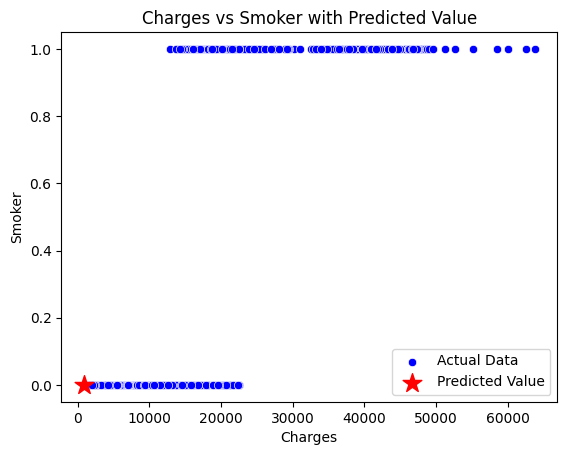

In [50]:
sns.scatterplot(x=insurance['charges'], y=insurance['smoker_encode'], color='blue', label='Actual Data')

age_value_of_my_data = my_data[5]
plt.scatter(age_value_of_my_data, pred, color='red', marker='*', s=200, label='Predicted Value')

plt.xlabel('Charges')
plt.ylabel('Smoker')
plt.title('Charges vs Smoker with Predicted Value')
plt.legend()
plt.show()

### DECISION TREE ###

In [51]:
X = insurance[["age", "bmi", "children", "sex_encode", "region_encode", "charges"]]
y = insurance["smoker_encode"]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# DecisionTreeRegressor parameters for GridSearch
param_grid = {
    'max_depth': [None,10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [54]:
# Creating model
tr = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(tr, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# Train it
grid_search.fit(X_train, y_train)

# Best Params
print(grid_search.best_params_)

# Best model
best_tree = grid_search.best_estimator_

# Prediction
y_pred = best_tree.predict(X_test)

#RMSE Calculating
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Squared Error: {mse}")

{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Root Mean Squared Error: 0.13457136670301897
Mean Squared Error: 0.018109452736318407


In [55]:
# DecisionTreeRegressor parameters for RandomizedSearch
param_distributions = {
    'max_depth': [None] + list(np.arange(10, 51, 10)),
    'min_samples_split': np.arange(2, 11, 1),
    'min_samples_leaf': np.arange(1, 5, 1)
}

# RandomizedSearchCV settings
random_search = RandomizedSearchCV(tr, param_distributions, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42, return_train_score=True)

# Train it
random_search.fit(X_train, y_train)

# Best Params
print(random_search.best_params_)

# Best model
best_tree = random_search.best_estimator_

# Prediction
y_pred = best_tree.predict(X_test)

#RMSE Calculating
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Squared Error: {mse}")


{'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None}
Root Mean Squared Error: 0.13457136670301897
Mean Squared Error: 0.018109452736318407


### CROSS VALIDATION (LINEAR - LOGISTIC - DESICION TREE - RANDOM FOREST) ###

In [56]:
X = insurance[["age", "bmi", "children", "sex_encode", "region_encode", "charges"]]
y = insurance["smoker_encode"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [57]:
# Convert X_train to numpy array if it's a pandas DataFrame. This can be useful when certain algorithms or operations
# expect input data in numpy array format instead of pandas DataFrame.
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.values
# Convert X_test to numpy array if it's a pandas DataFrame. Similar reason as above.
if isinstance(X_test, pd.DataFrame):
    X_test = X_test.values

In [58]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()

In [60]:
from sklearn.model_selection import cross_val_score

models = [lr, dtr, rfr, gbr]
model_names = ["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting"]

for model, name in zip(models, model_names):
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f"{name} Mean MSE: {-score.mean()}")


Linear Regression Mean MSE: 0.042526622190696015
Decision Tree Mean MSE: 0.028971962616822427
Random Forest Mean MSE: 0.016295794392523367
Gradient Boosting Mean MSE: 0.01984695746377687


In [61]:
models = [lr, dtr, rfr, gbr]
model_names = ["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting"]

for model, name in zip(models, model_names):
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f"{name} Mean MSE: {-score.mean()}")


from sklearn.metrics import mean_squared_error, mean_absolute_error

# Iterate over models and predict
for model, name in zip(models, model_names):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"\nModel: {name}")
    print(f"\nModel Score: {model.score(X_train,y_train)}")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")


Linear Regression Mean MSE: 0.042526622190696015
Decision Tree Mean MSE: 0.029906542056074764
Random Forest Mean MSE: 0.01670214953271028
Gradient Boosting Mean MSE: 0.01941431286040478

Model: Linear Regression

Model Score: 0.7441781064585251
Mean Squared Error: 0.0377726981136018
Mean Absolute Error: 0.11574108284292886

Model: Decision Tree

Model Score: 1.0
Mean Squared Error: 0.014925373134328358
Mean Absolute Error: 0.014925373134328358

Model: Random Forest

Model Score: 0.9863045721925133
Mean Squared Error: 0.012483955223880594
Mean Absolute Error: 0.02414179104477612

Model: Gradient Boosting

Model Score: 0.9813266103565634
Mean Squared Error: 0.014679694859181813
Mean Absolute Error: 0.03190696330982849


# Comments:

If we look at all the models, we see that the Random Forest model has the lowest MSE on the test data compared to the others. This shows that on average this model gives the closest results to the true values.

As for MAE, the Decision Tree gives the best result. However, I find it a bit strange that the MAE and MSE values are the same. This makes me think that the Decision Tree model may be predicting the exact values in the training data and may be a bit overfitting.

The MAE of the Random Forest is a bit higher than the Decision Tree, but overall the difference is not that big. So, on average, the Random Forest model's predictions can deviate from the true value by about 0.0246 units.

### Model Score Comments:
##### Linear Regression:
A score of 0.744 suggests that about 74.4% of the variance in the dependent variable is predictable by the independent variables. While it's a decent score, it's certainly lower than the tree-based models. Linear Regression makes the assumption of linearity, which might not hold for this dataset.

##### Decision Tree:
A score of 1.0 suggests that the decision tree is perfectly fitting the training data. This is often a red flag as it indicates that the model could be overfitting. Overfit models might perform well on the training set but may struggle to generalize well on unseen data.

##### Random Forest:
With a score of 0.986, the Random Forest model is explaining about 98.6% of the variance, which is quite high. Given that it's a bagging technique with multiple trees, it inherently reduces the risk of overfitting compared to a single Decision Tree.

##### Gradient Boosting:
The model score of 0.981 indicates that this model is also performing very well. Gradient Boosting is a boosting technique and focuses on correcting the errors of the previous trees. Its performance being close to the Random Forest suggests that both ensemble methods are efficient for this dataset.

### Conclusion:

In my observation, Random Forest is the most successful model overall. It produces very impressive results with both a low MSE and a relatively low MAE. The Gradient Boost model is also quite good and may be a better option for some special cases.

It is worth mentioning for your consideration: Both Random Forest and Gradient Boosting are combined methods and can therefore detect more complex structures in the data. But when making a final decision, I recommend you to consider other factors such as computational time, model explainability or the specific requirements of the job.

### Summary:
Based on the results and evaluation metrics, the Random Forest model stands out as the most effective in predicting outcomes with low errors. The model scores also solidify this inference. However, the perfect score of the Decision Tree model is concerning, as it hints at potential overfitting. Gradient Boosting, with its impressive results and score, serves as a reliable alternative to Random Forest.